<img src="img/logo.png">



---
# Sommaire

 1. Introduction
    - 1.1. Importation des librairies
    - 1.2. Chargement du fichier
    - 1.3. Création du sommaire
 2. Exploration - aperçu de l'analyse descriptive des données
 3. Étude des outliers
    - 3.1. Statistiques descriptives et distributions
    - 3.2. Proportion d'outliers parmi les vrais/faux billets
    - 3.3. Visualisation
 4. Vérification de la normalité en vue de l'étude des corrélations
    - 4.1. Graphiques de distribution
    - 4.2. Calcul de Skew, Kurtosis et tests de normalité de D'Agostino-Pearson et Shapiro-Wilk
 5. Corrélation de Spearman
 6. Boxplots
 7. Pairplots
 8. Étude des NaNs avant imputation
 9. Comparaison des modèles de régression
    - 9.1. Sans la variable 'is_genuine'
    - 9.2. Avec la variable 'is_genuine'
 10. Régression linéraire pour remplir les NaNs
     - 10.1. Choix des meilleurs paramètres et vérification des hypothèses de la régression linéaire
        - 10.1.1. Choix de la constante ou pas
        - 10.1.2. Choix des variables
     - 10.2. Entraînement du modèle
        - 10.2.1. SHAP (SHapley Additive exPlanations)
        - 10.2.2. Visualisation de la séparation et prédiction des données
        - 10.2.3. Évaluation de la performance du modèle
        - 10.2.4. Comparaison des valeurs réelles vs. prédites sur le test set
        - 10.2.5. Imputation des NaNs avec le modèle entraîné
 11. Vérification de la variable 'margin_low' après régression linéaire
     - 11.1. Nombre de NaNs
     - 11.2. Distributions avant / après remplissage des NaNs
 12. Exportation du dataframe final

---

# Introduction

## Importation des librairies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import seaborn as sns
import itertools
import warnings
import sys
from bspline import Bspline
warnings.filterwarnings('ignore')

# Scipy
import scipy
import scipy.stats as stats
from scipy.stats import shapiro, normaltest, levene, probplot, t
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox

# Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, normal_ad
from statsmodels.stats.stattools import durbin_watson

# Scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import shap

# fonctions personnelles
from mylib.fonction_exploration import exploration_long, exploration1, exploration2, exploration3, exploration4
from mylib.fonction_primary_key import test_pk
from mylib.fonction_merge import df_merge
from mylib.toc import toc
from mylib.evaluate_models import evaluate_regression_models
from mylib.fonction_outliers import analyze_outliers, analyze_outliers_bool
from mylib.fonction_distribution_stats import plot_distribution_stats, plot_distribution_comparison
from mylib.fonction_normality import calculate_normality
from mylib.outlier_piecharts import plot_outlier_piecharts
from mylib.regression_analysis import regression_analysis
from mylib.custom_boxplots import plot_boxplots_bool

# Versions
print("Version de Python:", sys.version)
print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)
print("Version de seaborn:", sns.__version__)
print("Version de scikit-learn:", sklearn.__version__)
print("Version de scipy:", scipy.__version__)

# Paramétrage du style du texte
bold = "\033[1m"
italic = '\033[3m'
red = '\033[91m'
cyan = "\033[34m"
end = "\033[0;0m"

# Couleurs des graphiques
RED = "#E3120B"
GREY = "#a2a2a2"

# Couleurs à contraste élevé pour améliorer l'accessibilité des graphiques aux personnes malvoyantes
color_true = '#1F77B4'
color_false = '#FF7F0E'

Version de Python: 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Version numpy : 1.23.5
Version pandas : 1.4.4
Version de seaborn: 0.12.1
Version de scikit-learn: 1.2.0
Version de scipy: 1.11.2


## Chargement du fichier

In [2]:
chemin_billets = 'src/billets.csv'
billets = pd.read_csv(chemin_billets, sep=";")

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Création du sommaire

In [4]:
#file_path = '1.EDA_regression_lineaire.ipynb'
#rec_path = '1.EDA_regression_lineaire.ipynb'
#toc(file_path, rec_path)

# Exploration - aperçu de l'analyse descriptive des données

In [5]:
exploration1(billets) #la fonction est visible dans le fichier mylib

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810000,104.860000,104.950000,4.520000,2.890000,112.830000
1,True,171.460000,103.360000,103.660000,3.770000,2.990000,113.090000
2,True,172.690000,104.480000,103.500000,4.400000,2.940000,113.160000
,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1497,False,171.800000,104.010000,104.120000,5.510000,3.360000,111.950000
1498,False,172.060000,104.280000,104.060000,5.170000,3.460000,112.250000
1499,False,171.470000,104.150000,103.820000,4.630000,3.370000,112.070000
,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1077,False,171.800000,104.120000,104.060000,5.660000,3.290000,111.090000
318,True,172.220000,103.510000,103.990000,3.670000,3.060000,112.860000


In [6]:
exploration2(billets) #la fonction est visible dans le fichier mylib

,Nombre de valeurs totales,Type des données,Nombre de NaN,NaN en %,Nombre de valeurs uniques,Valeurs uniques en%
is_genuine,1500,bool,0,0.00,2,0.13
diagonal,1500,float64,0,0.00,159,10.60
height_left,1500,float64,0,0.00,155,10.33
height_right,1500,float64,0,0.00,170,11.33
margin_low,1463,float64,37,2.47,285,19.00
margin_up,1500,float64,0,0.00,123,8.20
length,1500,float64,0,0.00,336,22.40


<span style="color:red">**=> On note 37 NANs dans la variable margin_low**</span>

Il y a des données manquantes, nous allons procéder à une imputation par régression linéaire pour éviter une perte d'informations.

In [7]:
exploration3(billets) #la fonction est visible dans le fichier mylib


---------------------------------------
Nombre de lignes et de colonnes (shape)
--------------------------------------- 

(1500, 7) 

--------------------------------------
Affichage des NaN (isna().any(axis=1))
-------------------------------------- 

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length
72          True    171.94       103.89        103.45         NaN       3.25  112.79
99          True    171.93       104.07        104.18         NaN       3.14  113.08
151         True    172.07       103.80        104.38         NaN       3.02  112.93
197         True    171.45       103.66        103.80         NaN       3.62  113.27
241         True    171.83       104.14        104.06         NaN       3.02  112.36
251         True    171.80       103.26        102.82         NaN       2.95  113.22
284         True    171.92       103.83        103.76         NaN       3.23  113.29
334         True    171.85       103.70        103.96         NaN 

<span style="color:red">**=> Pas de doublons**</span>

In [8]:
exploration4(billets) #la fonction est visible dans le fichier mylib

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_genuine,1500,2,True,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagonal,1500.00,NaN,NaN,NaN,171.96,0.31,171.04,171.75,171.96,172.17,173.01
height_left,1500.00,NaN,NaN,NaN,104.03,0.30,103.14,103.82,104.04,104.23,104.88
height_right,1500.00,NaN,NaN,NaN,103.92,0.33,102.82,103.71,103.92,104.15,104.95
margin_low,1463.00,NaN,NaN,NaN,4.49,0.66,2.98,4.01,4.31,4.87,6.90
margin_up,1500.00,NaN,NaN,NaN,3.15,0.23,2.27,2.99,3.14,3.31,3.91
length,1500.00,NaN,NaN,NaN,112.68,0.87,109.49,112.03,112.96,113.34,114.44


# Étude des outliers

## Statistiques descriptives et distributions

Total of outliers in the dataset: 356
Percentage of outliers in the dataset: 23.73 %




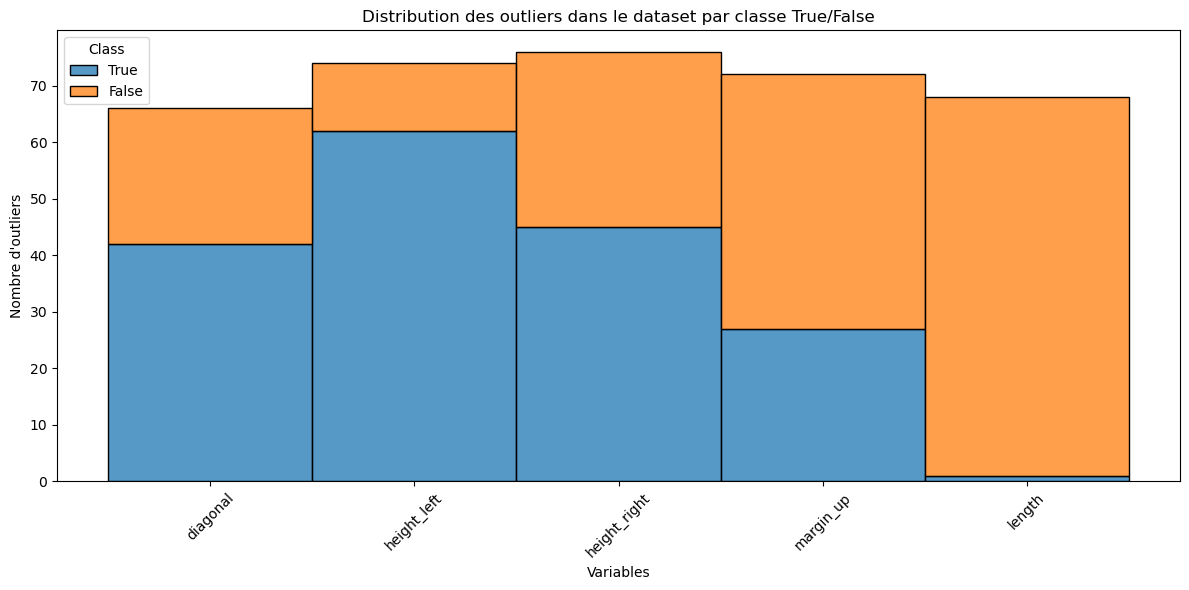


DÉTAIL DES OUTLIERS PAR VARIABLE


diagonal : 66 outliers - 4.4 % of the dataset - min 171.04 - max 173.01 - mean 171.84 - std 0.71

      diagonal  is_genuine
1142    171.04       False
729     171.04        True
1388    171.05       False
636     171.13        True
1089    171.13       False
1020    171.14       False
1254    171.15       False
1467    171.16       False
421     171.19        True
1099    171.19       False
1417    171.21       False
1069    171.21       False
557     171.24        True
56      171.25        True
776     171.26        True
1270    171.26       False
1181    171.26       False
220     171.26        True
1384    171.26       False
131     171.27        True
169     171.28        True
225     171.29        True
1487    171.30       False
16      171.30        True
1287    171.31       False
1098    171.32       False
1139    171.32       False
1301    171.33       False
232     171.34        True
1457    171.34       False
804     171.34        True
73

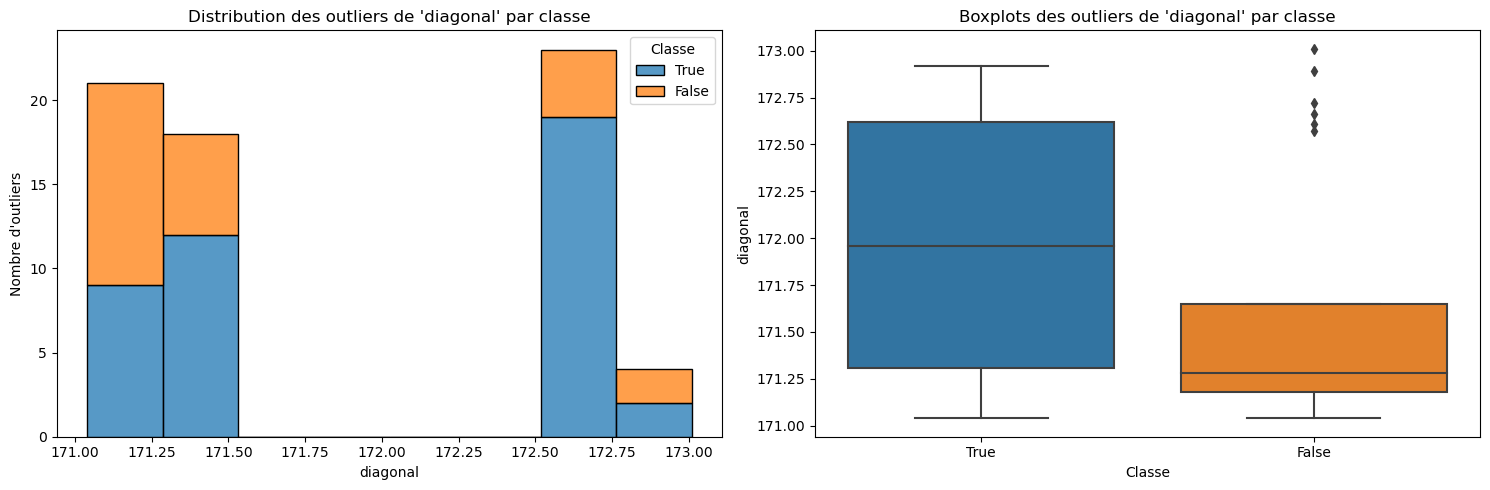


height_left : 74 outliers - 4.93 % of the dataset - min 103.14 - max 104.88 - mean 103.89 - std 0.68

      height_left  is_genuine
292        103.14        True
224        103.20        True
230        103.22        True
122        103.22        True
302        103.22        True
646        103.23        True
601        103.25        True
515        103.25        True
209        103.25        True
251        103.26        True
769        103.27        True
920        103.27        True
267        103.27        True
803        103.27        True
76         103.30        True
181        103.31        True
706        103.31        True
168        103.32        True
219        103.33        True
786        103.33        True
812        103.34        True
779        103.34        True
612        103.35        True
941        103.35        True
101        103.35        True
1          103.36        True
997        103.38        True
346        103.38        True
407        103.39        Tr

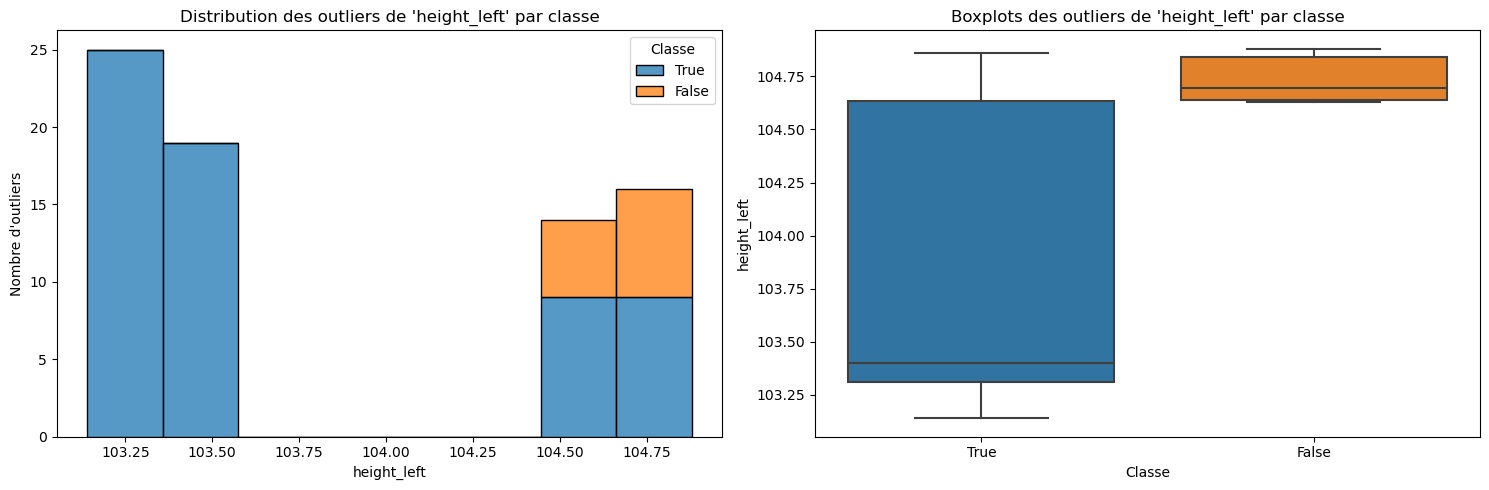


height_right : 76 outliers - 5.07 % of the dataset - min 102.82 - max 104.95 - mean 103.92 - std 0.77

      height_right  is_genuine
251         102.82        True
522         102.91        True
193         102.95        True
176         102.97        True
77          103.03        True
761         103.04        True
375         103.06        True
969         103.06        True
841         103.08        True
216         103.09        True
862         103.13        True
471         103.13        True
450         103.13        True
206         103.14        True
636         103.14        True
19          103.15        True
805         103.16        True
174         103.17        True
867         103.19        True
838         103.19        True
233         103.20        True
814         103.22        True
445         103.22        True
353         103.23        True
384         103.24        True
963         103.25        True
364         103.25        True
641         103.25        Tr

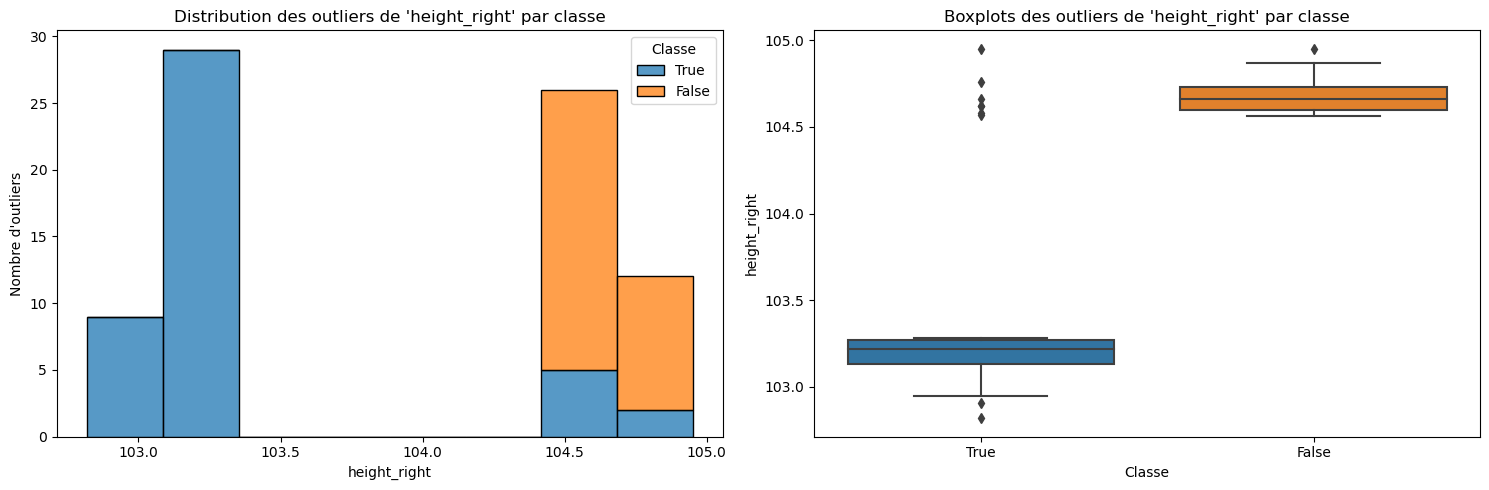


margin_low : 0 outliers - 0.0 % of the dataset - min None - max None - mean None - std None

Empty DataFrame
Columns: [margin_low, is_genuine]
Index: [] 



margin_up : 72 outliers - 4.8 % of the dataset - min 2.27 - max 3.91 - mean 3.32 - std 0.50

      margin_up  is_genuine
664        2.27        True
675        2.56        True
384        2.56        True
919        2.58        True
800        2.58        True
979        2.59        True
351        2.60        True
358        2.61        True
718        2.62        True
367        2.64        True
480        2.65        True
336        2.65        True
852        2.65        True
920        2.65        True
713        2.66        True
924        2.66        True
260        2.67        True
423        2.67        True
148        2.68        True
56         2.68        True
268        2.68        True
34         2.69        True
131        2.69        True
227        2.69        True
1120       3.61       False
1224       3.61      

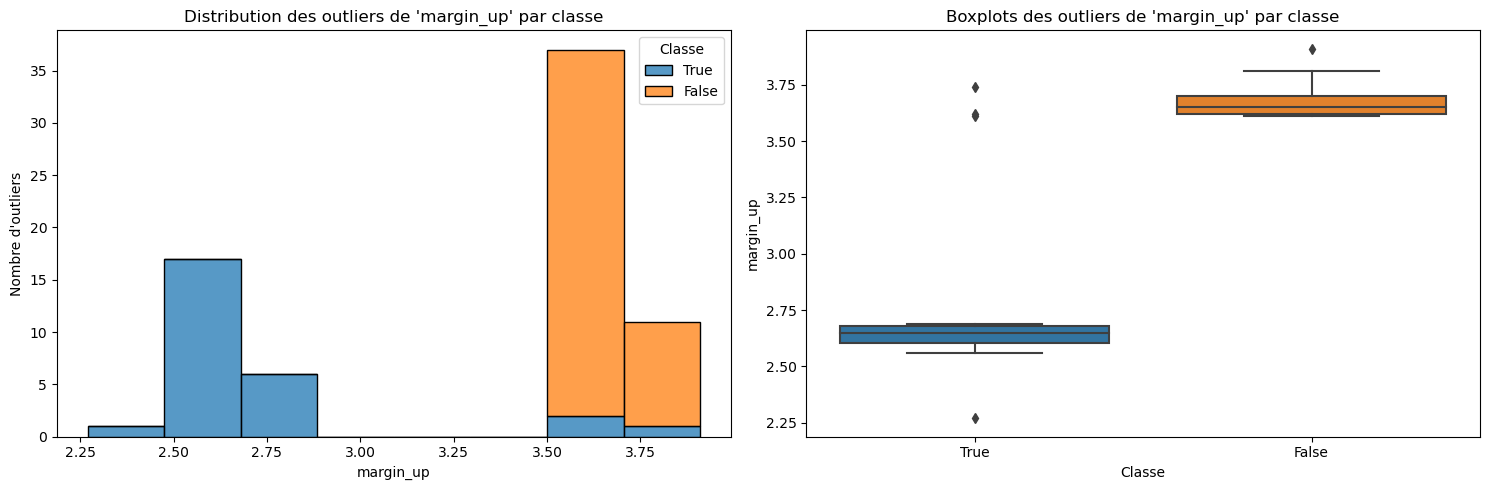


length : 68 outliers - 4.53 % of the dataset - min 109.49 - max 114.44 - mean 110.73 - std 0.53

      length  is_genuine
1082  109.49       False
1453  109.93       False
1355  109.97       False
1191  110.22       False
1221  110.29       False
1347  110.31       False
1283  110.34       False
1057  110.35       False
1074  110.36       False
1164  110.37       False
1410  110.44       False
1214  110.48       False
1359  110.48       False
1068  110.48       False
1203  110.49       False
1042  110.50       False
1443  110.52       False
1364  110.53       False
1205  110.59       False
1312  110.61       False
1369  110.64       False
1113  110.64       False
1008  110.66       False
1093  110.68       False
1276  110.68       False
1465  110.68       False
1088  110.68       False
1162  110.69       False
1310  110.69       False
1168  110.70       False
1258  110.70       False
1391  110.71       False
1485  110.71       False
1353  110.73       False
1291  110.73       False
10

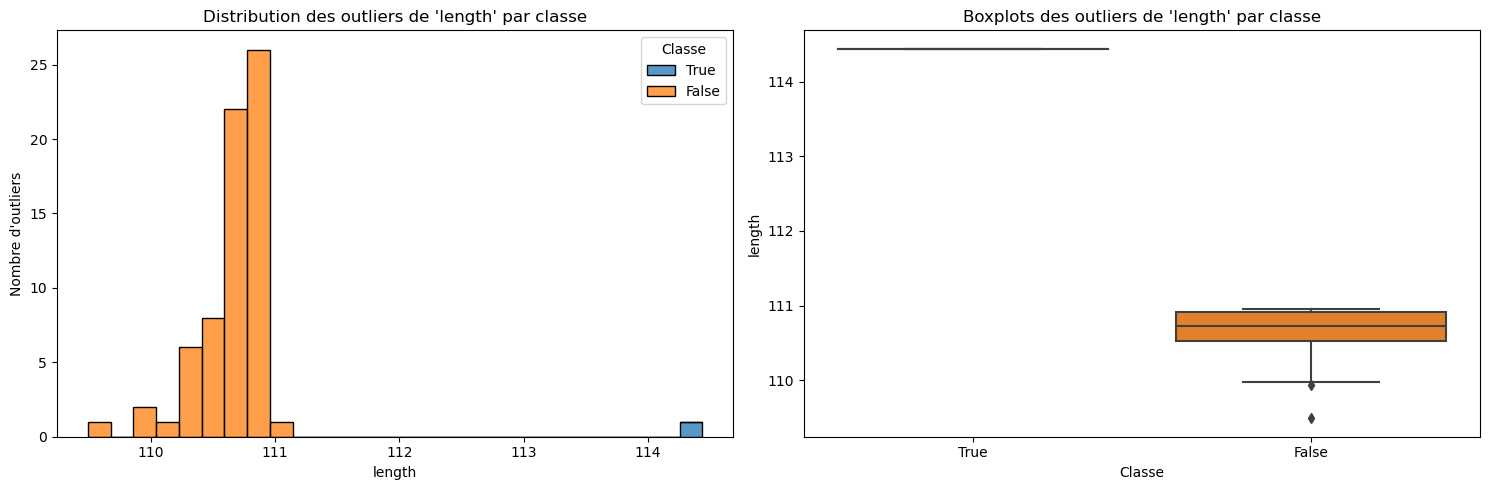

In [9]:
analyze_outliers_bool(billets)

## Proportion d'outliers parmi les vrais/faux billets

In [10]:
# on détermine les colonnes numériques
num = []
for i in billets.columns:
    if billets[i].dtypes == int or billets[i].dtypes == float:
        num.append(i)

In [11]:
# On calcule le z-score sur toutes les variables numériques
outlier_data = []
for i in num:
    billets.sort_values(by=i, inplace=True)
    z_scores = stats.zscore(billets[i])
    outlier_indices = billets.index[z_scores > 1.96]
    outlier_data.extend(billets.loc[outlier_indices, [i, 'is_genuine']].values.tolist())

# Créer le nouveau DataFrame pour les outliers
outliers_df = pd.DataFrame(outlier_data, columns=['Variable', 'is_genuine'])

# Affichage de la distribution en % des True/False parmi les outliers
outliers_true = round(len(outliers_df[outliers_df['is_genuine'] == True]) / len(outliers_df) * 100, 2)
outliers_false = round(len(outliers_df[outliers_df['is_genuine'] == False]) / len(outliers_df) * 100, 2)
print(bold + f"\nLe pourcentage d'outliers qui sont de vrais billets : {outliers_true} %")
print(f"Le pourcentage d'outliers qui sont de faux billets : {outliers_false} %" + end)


Le pourcentage d'outliers qui sont de vrais billets : 34.72 %
Le pourcentage d'outliers qui sont de faux billets : 65.28 %


## Visualisation

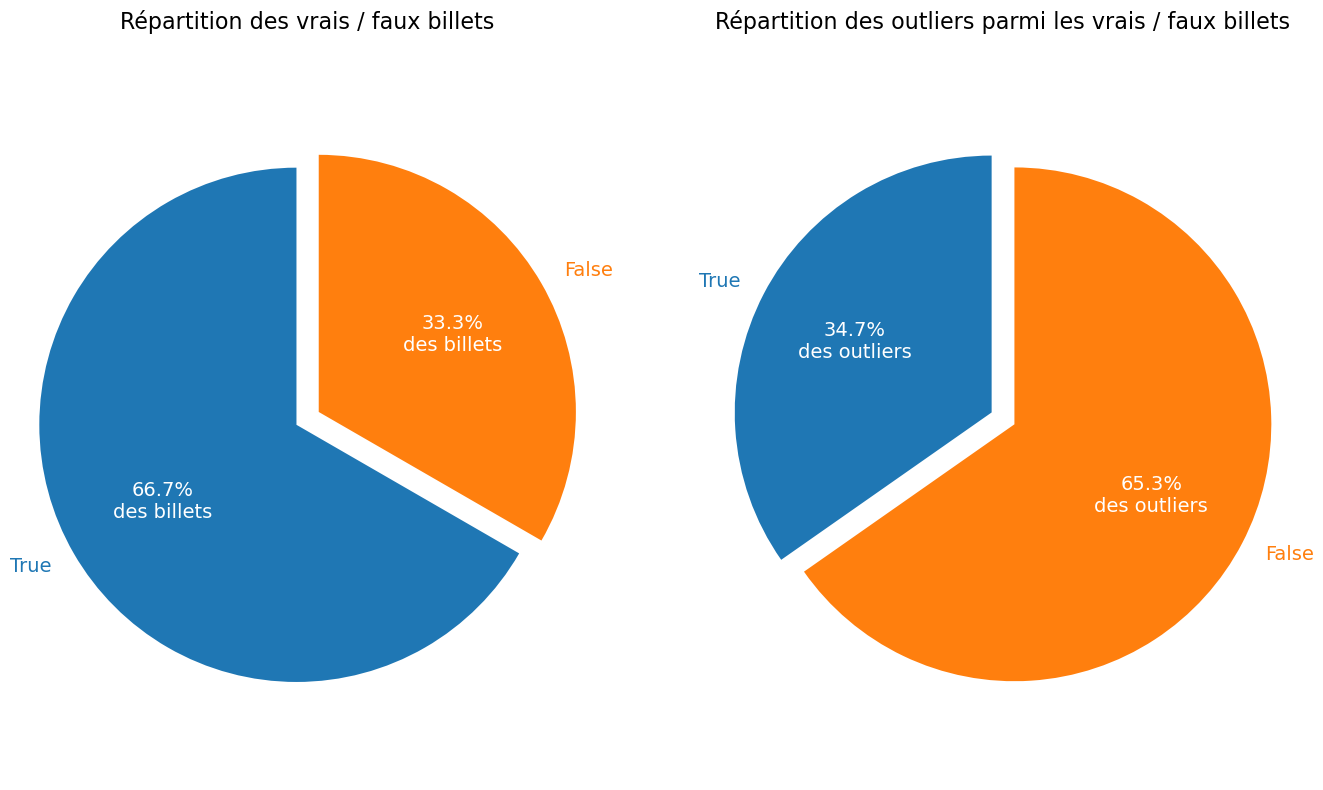

In [12]:
# Utilisation de la fonction visible dans mylib
title1 = "Répartition des vrais / faux billets"
title2 = "Répartition des outliers parmi les vrais / faux billets"

plot_outlier_piecharts(billets, 'is_genuine', title1, title2)

# Vérification de la normalité en vue de l'étude des corrélations

## Graphiques de distribution

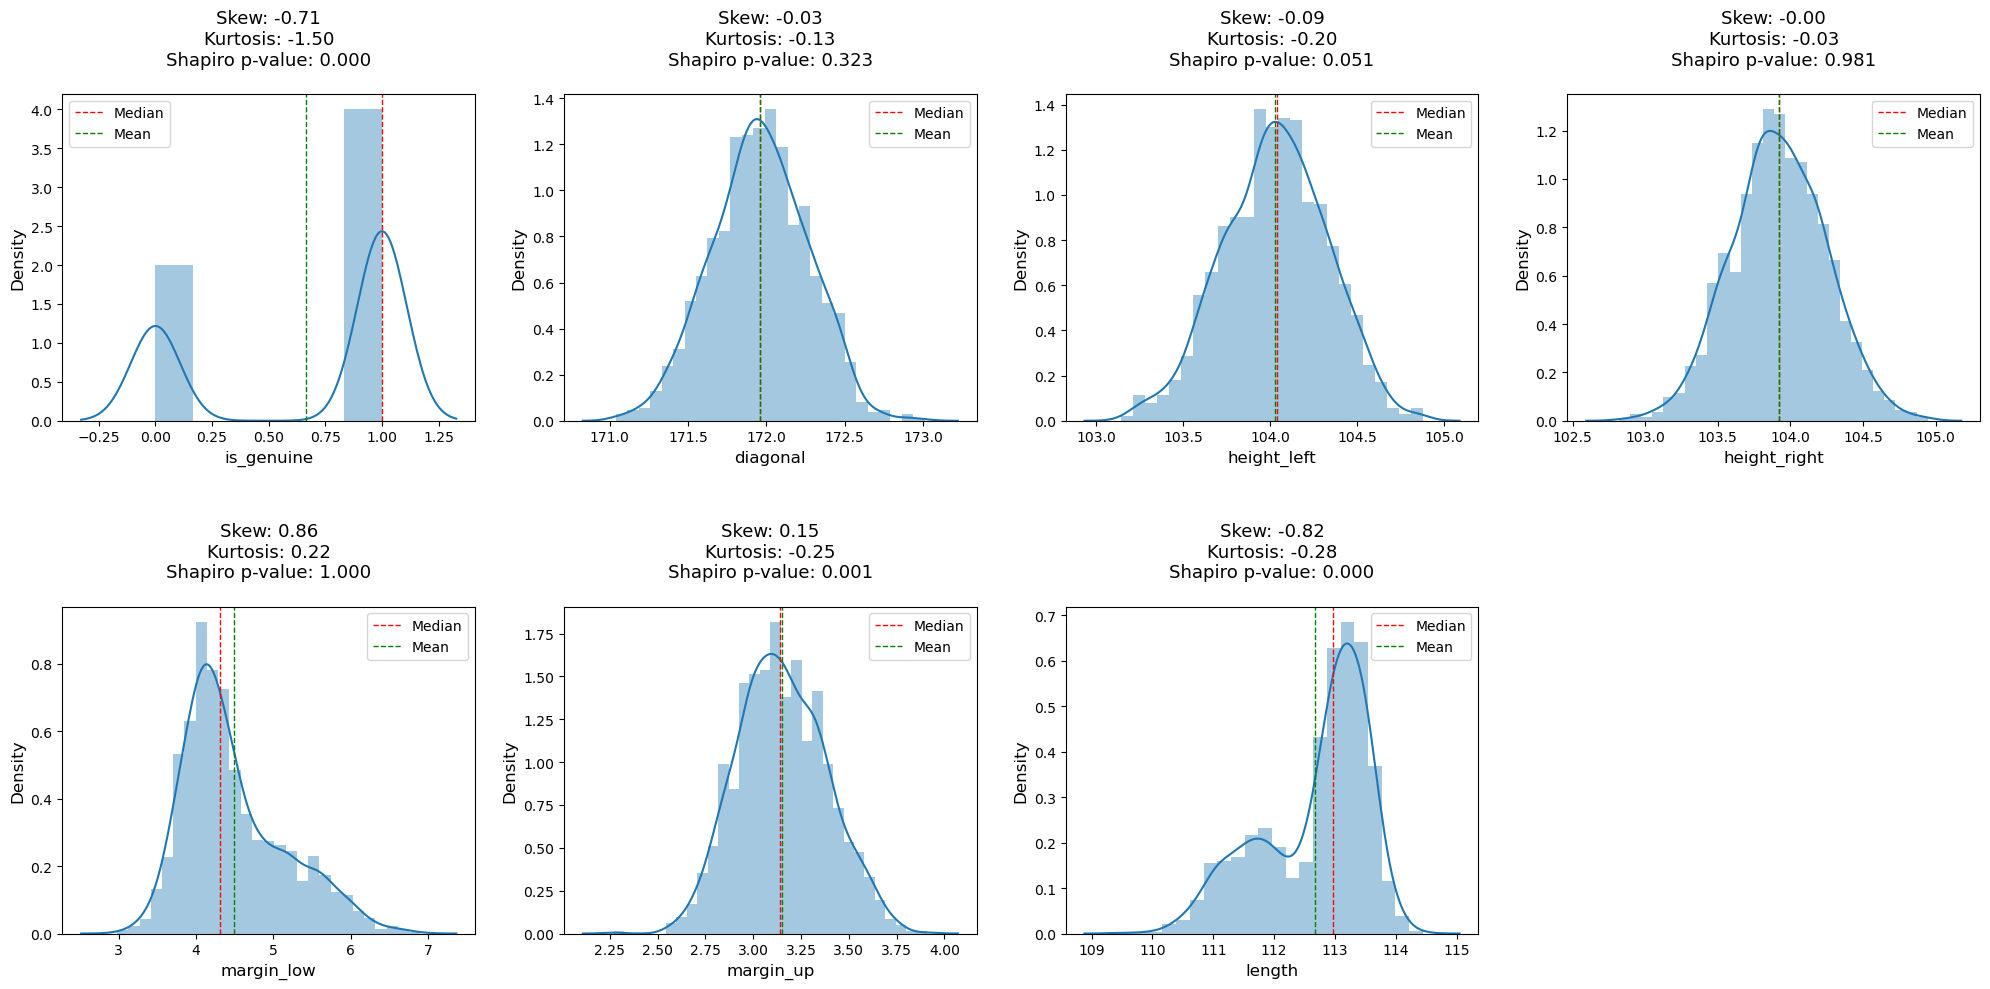

In [13]:
plot_distribution_stats(billets)

## Calcul de Skew, Kurtosis et tests de normalité de D'Agostino-Pearson et Shapiro-Wilk

In [14]:
calculate_normality(billets)

--------------------------------------------------
is_genuine :
Skew: -0.71   The distribution is moderately skewed
Kurtosis: -1.5   The distribution is light-tailed (negative), sometimes called platykurtic distributions 
---
Tests statistiques :
D'Agostino-Pearson: Statistic=10237.5158, p=0.0000 - Sample does not look Gaussian (reject H0)
Shapiro-Wilk: Statistic=0.5949, p=0.0000 - Sample does not look Gaussian (reject H0)
--------------------------------------------------
diagonal :
Skew: -0.03   The distribution is approximately symmetric
Kurtosis: -0.13   The distribution is approximately normal, sometimes called mesokurtic distributions 
---
Tests statistiques :
D'Agostino-Pearson: Statistic=1.2839, p=0.5263 - Sample looks Gaussian (fail to reject H0)
Shapiro-Wilk: Statistic=0.9987, p=0.3234 - Sample looks Gaussian (fail to reject H0)
--------------------------------------------------
height_left :
Skew: -0.09   The distribution is approximately symmetric
Kurtosis: -0.2   The distr

<span style="color:red">**=> Les tests confirment que plusieurs variables sont assymétriques et ne suivent pas une loi normale**</span>

<span style="color:red">**=> La normalité de la distribution n'étant pas respectée, la corrélation de Spearman sera choisie pour la suite de l'analyse**</span>

# Corrélation de Spearman

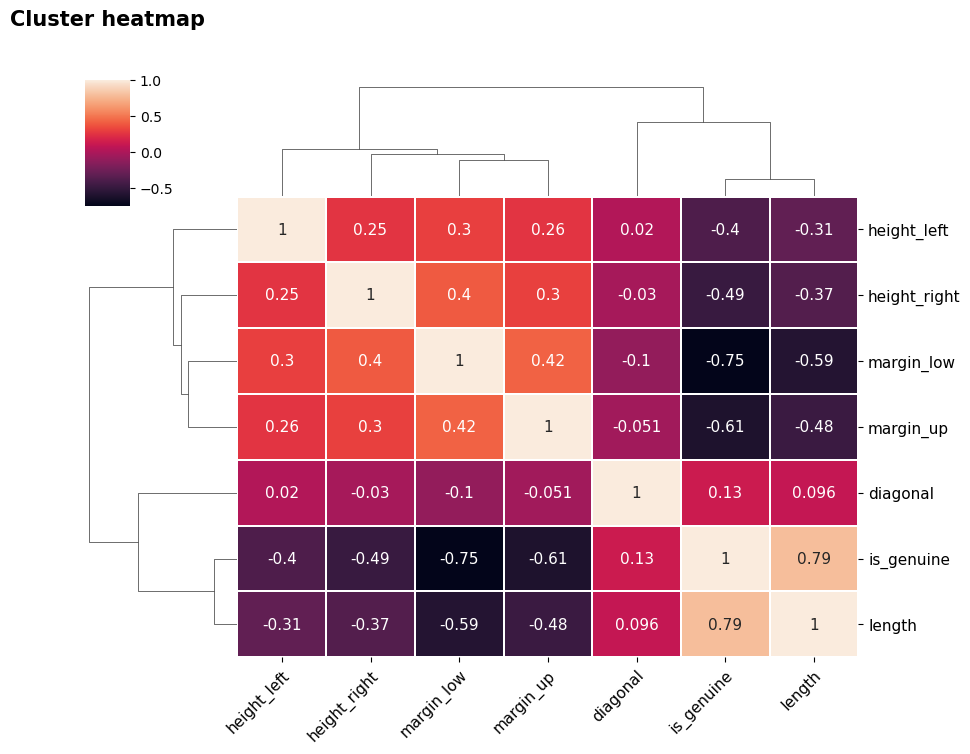

In [15]:
# Créer un clustermap
corr = billets.corr(method='spearman')
g = sns.clustermap(data=corr, linewidths=0.1, annot=True, annot_kws={"size": 11},
                   figsize=(9, 7))

# Personnaliser les étiquettes d'axe
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=11)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=11)

# Titre du clustermap
plt.title("Cluster heatmap\n\n", size=15, fontweight='bold')

plt.savefig('Cluster heatmap.jpeg')
plt.show()

=> On remarque deux groupes distincts :
1. `height_left`, `height_right`, `margin_low` et `margin_up`
2. `diagonal`, `is_genuine` et `length`

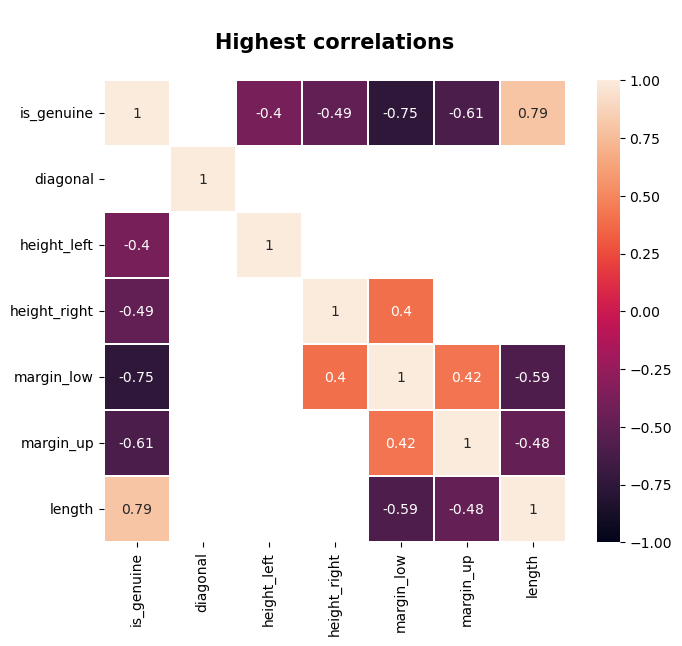

In [16]:
# beaucoup d'informations, on va visualiser les corrélations les plus élevées
corr = billets.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr[(corr >= 0.395) | (corr <= -0.395)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("\nHighest correlations\n", size=15, fontweight='bold' )
plt.savefig('highest_corr.jpeg');

<span style="color:red">**=> On remarque les corrélations suivantes :**</span>

+ is_genuine avec :
    + length
    + margin_low
    + margin_up
    + height_right
<br><br>
+ margin_low avec :
    + is_genuine
    + length
    + margin_up
    + height_right
<br><br>
+ margin_up avec :
    + is_genuine
    + length
    + margin_low
<br><br>
+ length avec : 
    + is_genuine
    + margin_low
    + margin_up
    
<span style="color:red">**=> Ainsi les variables ayant le plus d'influence sont length, margin_low puis margin_up**</span>

# Boxplots

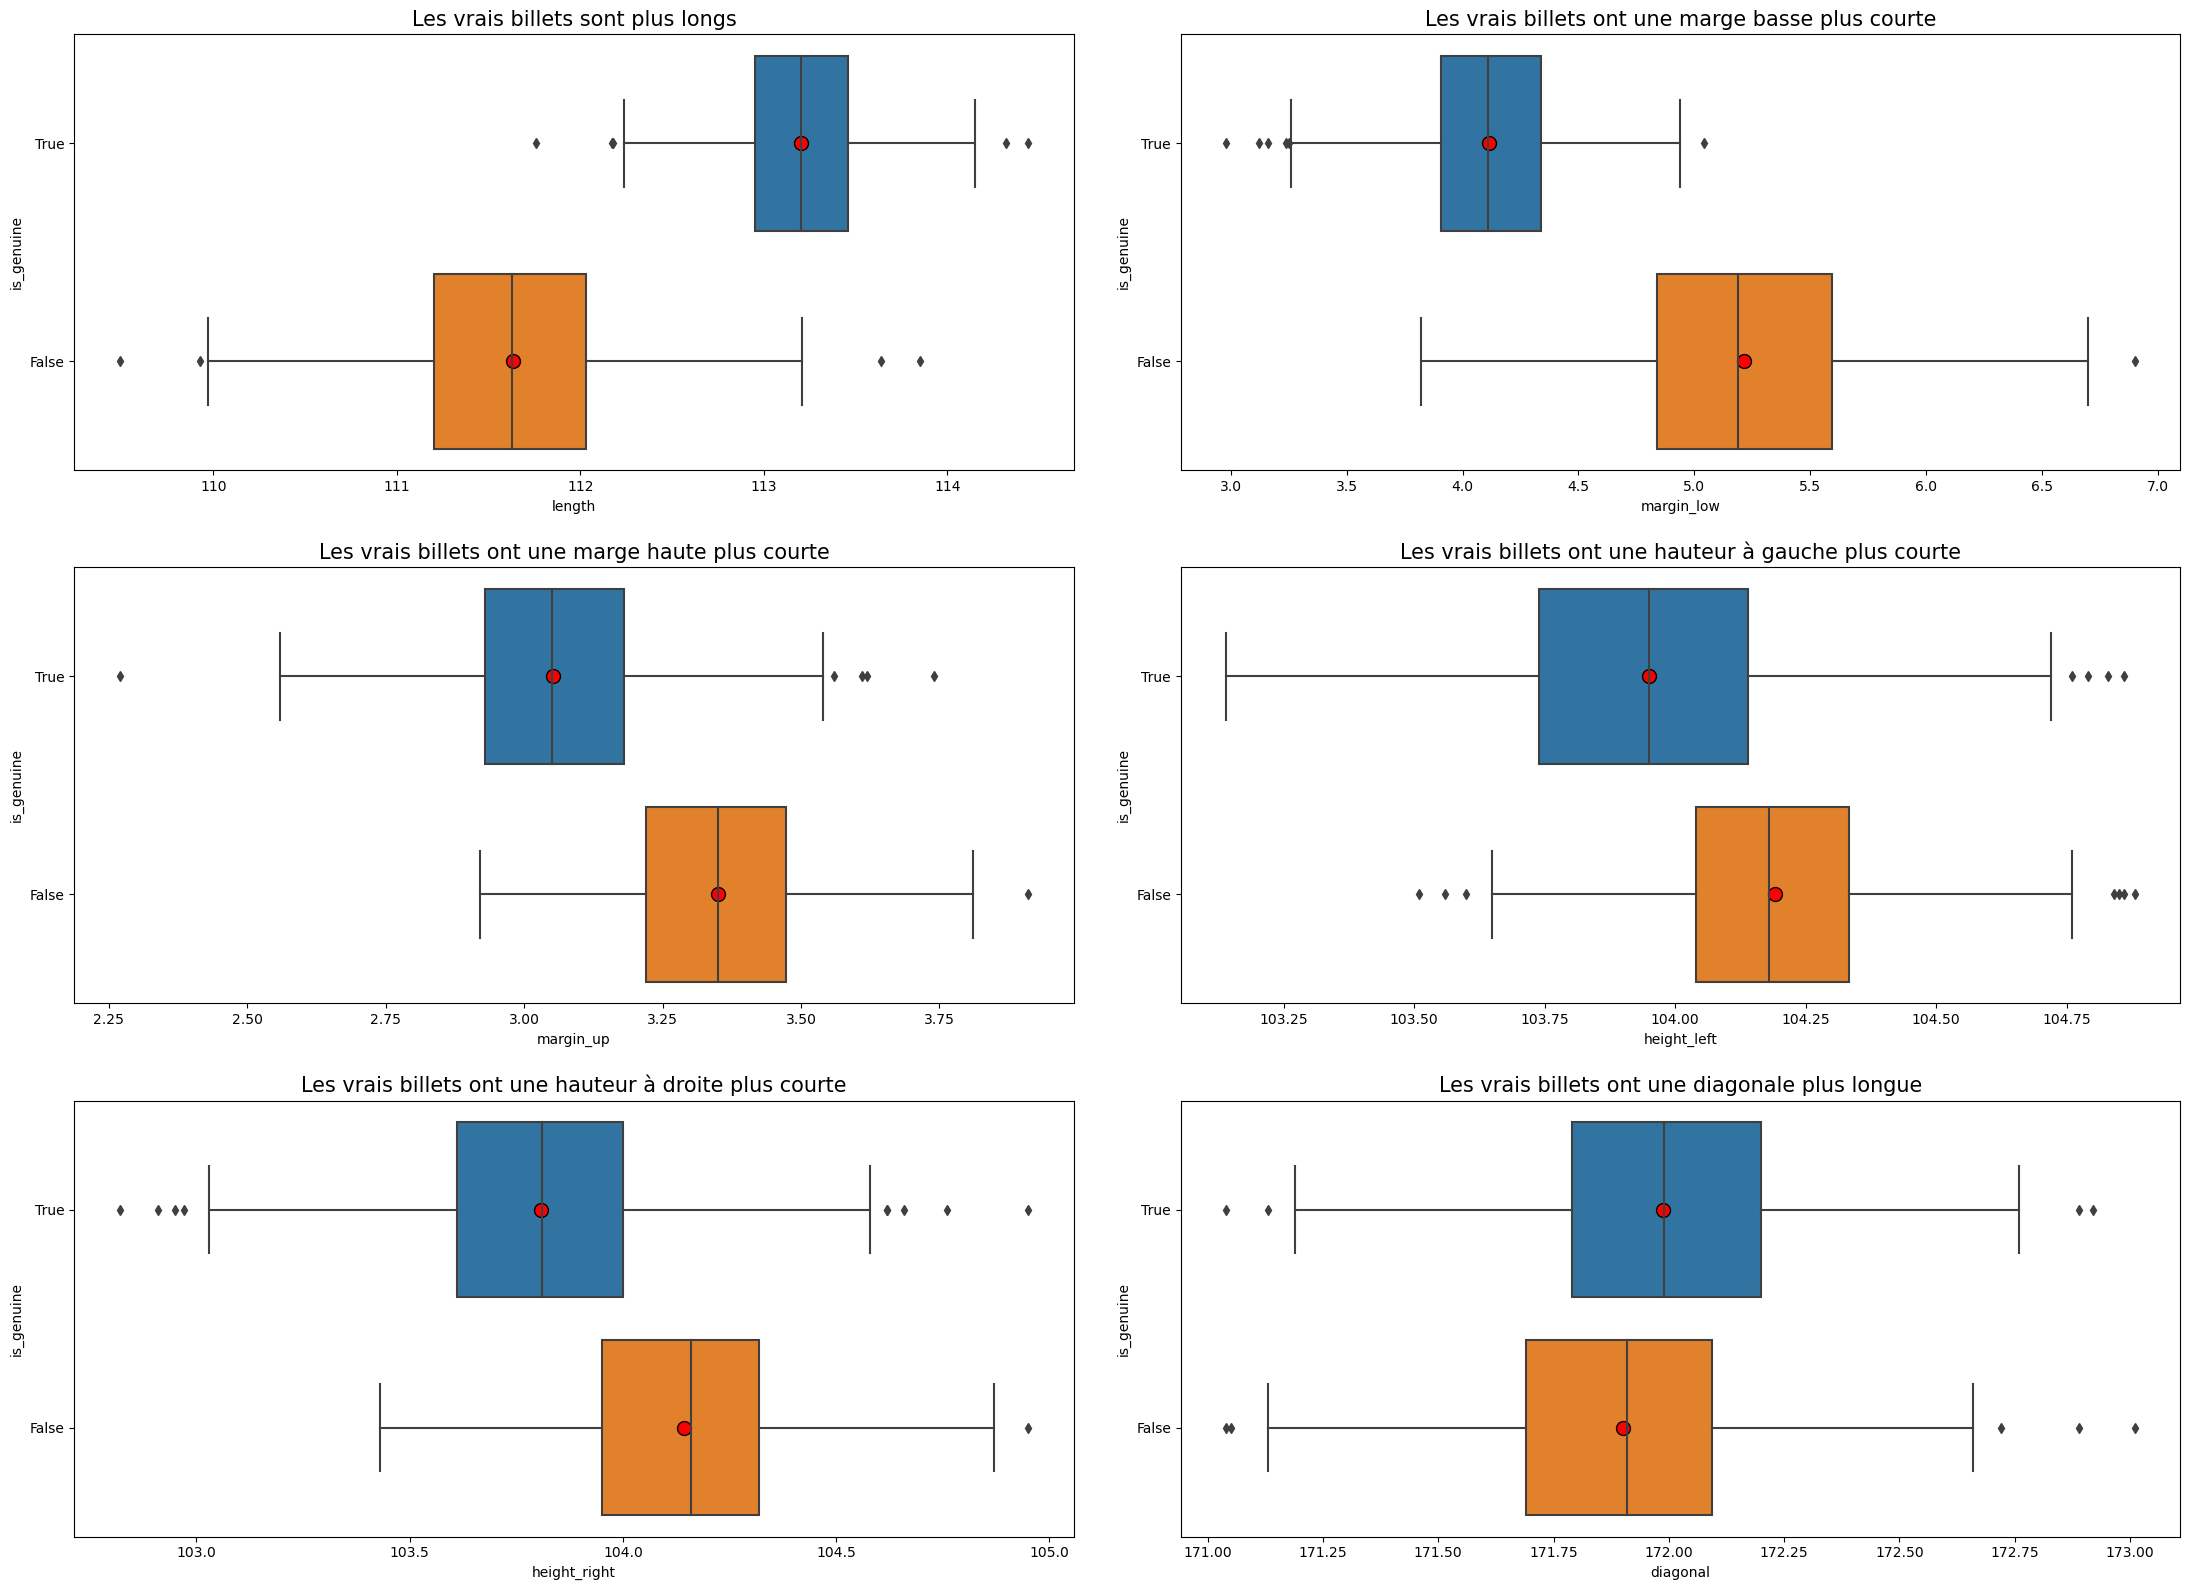

In [17]:
# Liste des variables à traiter
variables = ['length', 'margin_low', 'margin_up', 'height_left', 'height_right', 'diagonal']

# Liste des titres personnalisés pour chaque graphique
titles = ['Les vrais billets sont plus longs', 
          'Les vrais billets ont une marge basse plus courte',
          'Les vrais billets ont une marge haute plus courte', 
          'Les vrais billets ont une hauteur à gauche plus courte',
          'Les vrais billets ont une hauteur à droite plus courte', 
          'Les vrais billets ont une diagonale plus longue']

plot_boxplots_bool(billets, variables, titles, target_variable='is_genuine')

# Pairplots

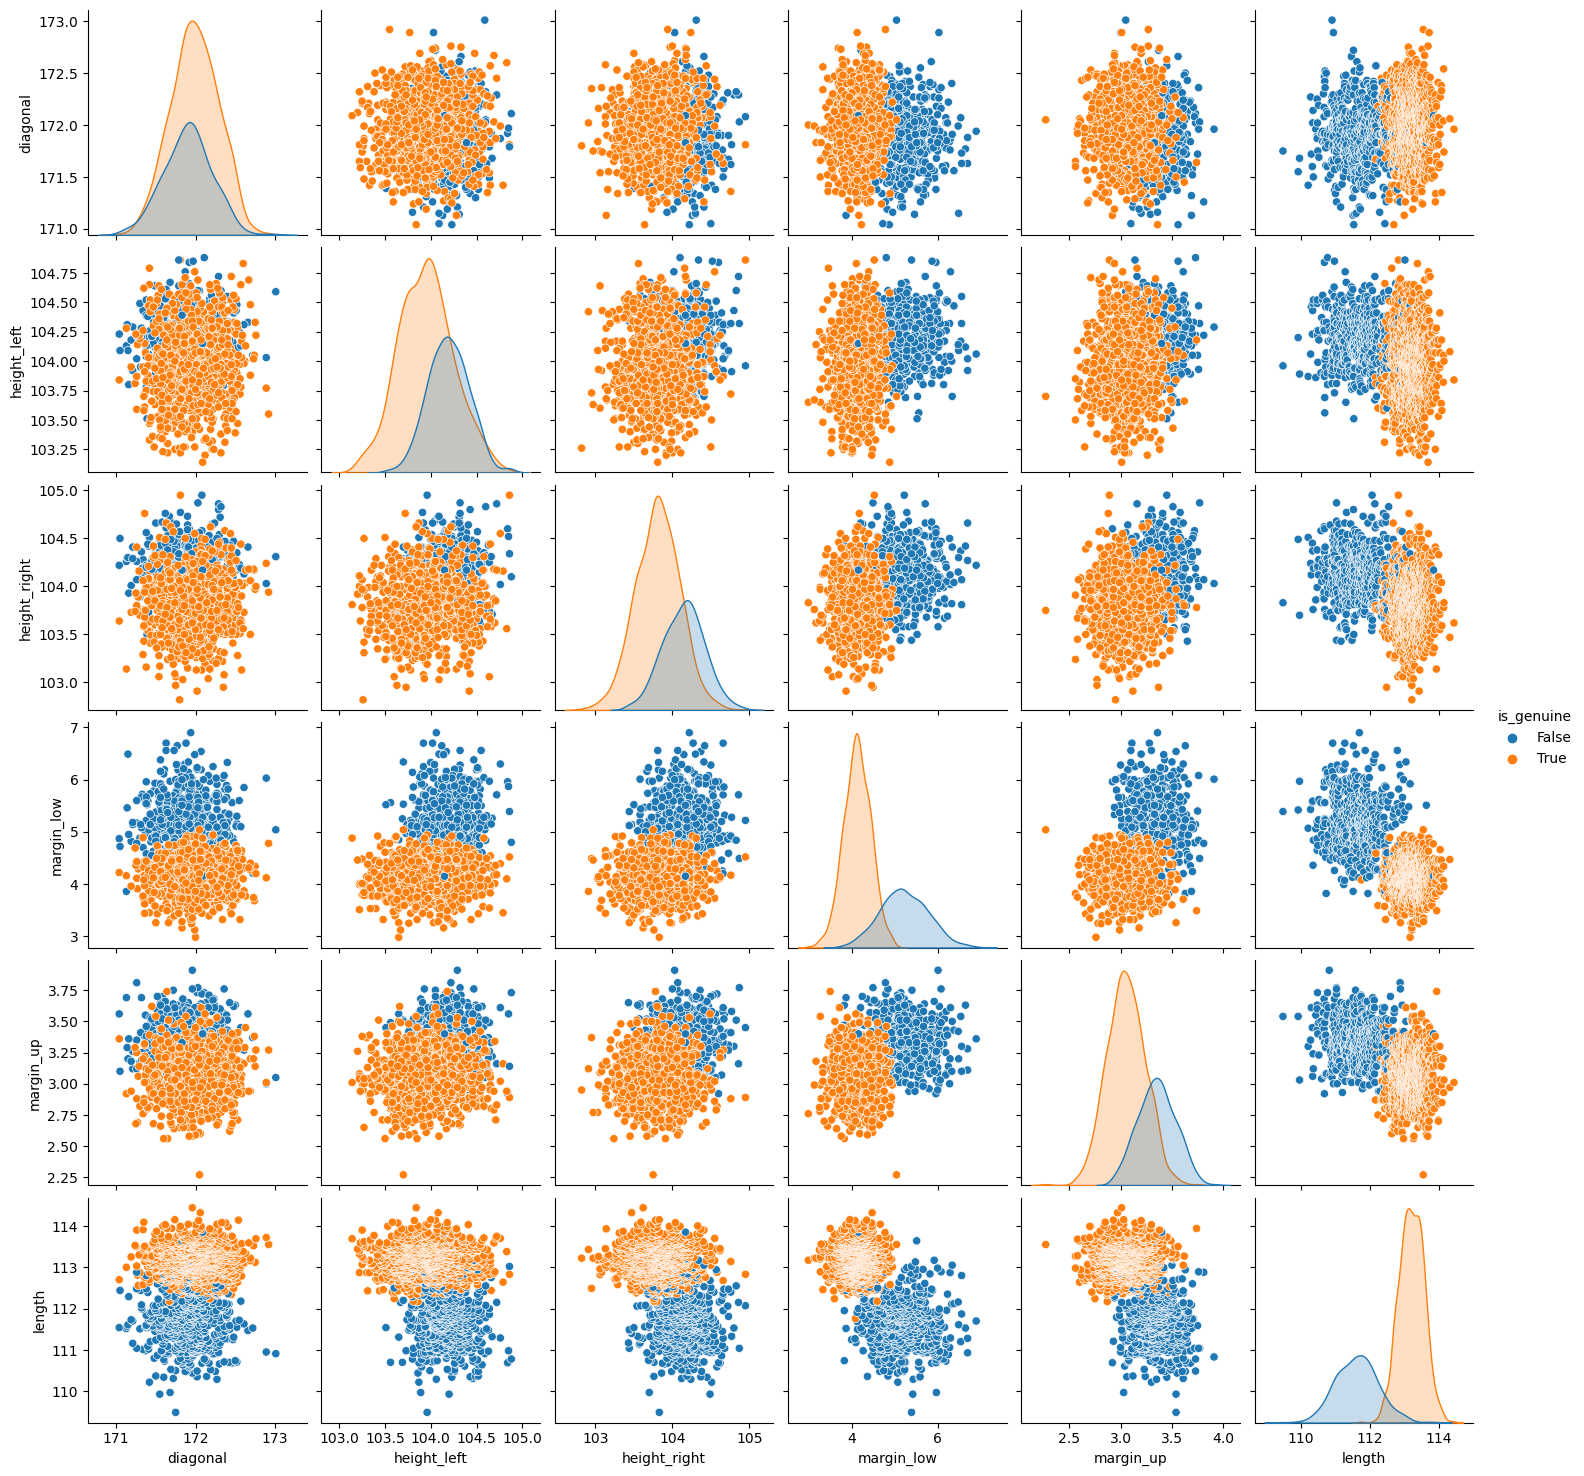

In [18]:
# Visualisation du pairplot
sns.pairplot(data=billets, hue='is_genuine') #diag_kind="hist", kind="kde"

# Display the plot
plt.show()

<span style="color:red">**=> On remarque que les combinaisons de variables ci-dessous ont une faible contribution dans la distinction des vrais / faux billets :**</span> 
+ diagonale vs. hauteur gauche
+ diagonale vs. hauteur droite
+ hauteur gauche vs. hauteur droite
    

<span style="color:red">**=> Une distinction est notable avec les combinaisons de variables suivantes :**</span>

+ length vs. diagonal
+ length vs. height_left
+ length vs. height_right
+ length vs. margin_low
+ length vs. margin_up
<br><br>    
+ margin_low vs. diagonal
+ margin_low vs. height_left
+ margin_low vs. height_right
+ margin_low vs. margin_low
+ margin_low vs. margin_up

# Rappel des NaNs avant imputation

In [19]:
# Nouveau dataframe qui sera utilisé après imputation des NaNs pour comparer les distributions de 'margin_low' avant / après régression linéaire
distri_avant = billets.copy()

# Identification et vérification du nombre de NaN avant régression linéaire
nan_indexes = billets[billets['margin_low'].isna()].index.tolist()
print(f"Il y a {len(nan_indexes)} NaNs ({round(len(nan_indexes) / len(billets) * 100, 2)} % du dataset) avant imputation")
print("\nIndex des NaNs :", nan_indexes)

Il y a 37 NaNs (2.47 % du dataset) avant imputation

Index des NaNs : [1347, 1303, 1176, 1435, 1438, 1076, 1315, 241, 1121, 739, 710, 946, 945, 654, 72, 611, 151, 413, 410, 445, 742, 99, 251, 871, 197, 675, 284, 844, 334, 981, 780, 845, 505, 919, 895, 481, 798]


# Comparaison des modèles de régression

In [20]:
# Séparer les lignes avec NaN et non NaN
billets_nan = billets[billets['margin_low'].isna()] #any(axis=1)
billets_not_nan = billets[~billets['margin_low'].isna()] #any(axis=1)

Se pose la question d'inclure ou d'exclure la variable `is_genuine` des variables prédictives, nous pourrions avoir un effet de biais si nous la gardons, car nous allons potentiellement utiliser la variable imputée `margin_low` pour le modèle de regression logistique servant à détecter la véracité des billets.

Comparons les deux modèles sans et avec `is_genuine` :

## Sans la variable 'is_genuine'

In [21]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(billets_not_nan.drop(columns=['is_genuine', 'margin_low', 'diagonal', 'height_left', 'height_right']), 
                                                    billets_not_nan['margin_low'], 
                                                    test_size=0.2, random_state=2) #random.randint(1, 100)

In [22]:
# Utilisation de la fonction pour évaluer les modèles
results = evaluate_regression_models(X_train, X_test, y_train, y_test, intercept=True)

                                      MAE    MSE  R-squared
Log + Linear Regression             0.080  0.010      0.457
Polynomial Regression               0.342  0.197      0.518
GAM Regression                      0.344  0.197      0.517
Gradient Boosting Regressor         0.354  0.206      0.494
K-Nearest Neighbors (KNN) Regressor 0.358  0.225      0.448
Winsorization + Linear Regression   0.360  0.212      0.480
Robust Regression (Huber)           0.364  0.218      0.465
Linear Regression                   0.366  0.218      0.465
Ridge Regression                    0.366  0.218      0.465
Random Forest Regression            0.394  0.246      0.396
XGBoost Regressor                   0.427  0.292      0.283
Support Vector Regression           0.429  0.321      0.213
Quantile Regression                 0.444  0.347      0.149
Decision Tree                       0.502  0.431     -0.056
Lasso Regression                    0.510  0.409     -0.004
Neural Network                      0.52

<div class="alert alert-block alert-warning">
<b></b>=> Les résultats montrent que les modèles log + regression linéaire ainsi que la regression polynomiale sont les plus performants
    <br>=> Cependant dans le cadre de ce projet nous réaliserons une regression linéaire classique pour remplir les NaNs, tel que demandé dans le cahier des charges par l'entreprise
</div>

## Avec la variable 'is_genuine'

In [23]:
# Transformer les booléens en integer
billets_not_nan['is_genuine'] = billets['is_genuine'].astype(int)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(billets_not_nan.drop(columns=['margin_low', 'diagonal', 'height_left', 'length', 'height_right']), 
                                                    billets_not_nan['margin_low'], 
                                                    test_size=0.2, random_state=2) #random.randint(1, 100)

In [24]:
# Utilisation de la fonction pour évaluer les modèles
results = evaluate_regression_models(X_train, X_test, y_train, y_test, intercept=True)

                                      MAE    MSE  R-squared
Log + Linear Regression             0.071  0.008      0.555
Polynomial Regression               0.322  0.178      0.564
Support Vector Regression           0.323  0.178      0.564
Ridge Regression                    0.323  0.179      0.560
Linear Regression                   0.323  0.180      0.560
Robust Regression (Huber)           0.323  0.179      0.560
Winsorization + Linear Regression   0.324  0.180      0.559
Neural Network                      0.325  0.183      0.552
GAM Regression                      0.326  0.182      0.554
Gradient Boosting Regressor         0.337  0.187      0.542
K-Nearest Neighbors (KNN) Regressor 0.361  0.218      0.466
XGBoost Regressor                   0.361  0.215      0.473
Random Forest Regression            0.362  0.217      0.469
Decision Tree                       0.370  0.227      0.443
Quantile Regression                 0.413  0.273      0.331
Lasso Regression                    0.51

<div class="alert alert-block alert-warning">
<b></b>=> Les résultats montrent que les modèles log + regression linéaire ainsi que la regression polynomiale, puis le SVR sont les plus performants
    <br>=> Cependant dans le cadre de ce projet nous réaliserons une regression linéaire classique pour remplir les NaNs, tel que demandé dans le cahier des charges par l'entreprise
</div>

Nous remarquons que les modèles avec la variable `is_genuine` ont une meilleure capacité d'explication de la variance des données (R2), par ailleurs dans la suite de l'analyse nous avons comparé la multicolinéarité des variables avec ou sans `is_genuine`, le meilleur score VIF obtenu sans est de 166.518 donc une forte multicolinéarité qui demeure, alors que si nous la gardons, le VIF passe à 2.623 donc une multicolinéarité annulée.

Au vu de ces résultats, à savoir un meilleur R2 et une absence de multicolinéarité si nous gardons `is_genuine`, sachant également que les données à imputer représentent 2.47% du dataset, nous décidons de garder la variable `is_genuine` pour la construction du modèle.

# Régression linéraire pour remplir les NaNs

Il y a plusieurs hypothèses à tester pour la régression linéaire :

1. **Linéarité** : Cette hypothèse stipule qu'il existe une relation linéaire entre les variables indépendantes et la variable dépendante. Nous pouvons la vérifier en examinant la forme des relations entre nos prédicteurs et notre variable dépendante.

2. **Normalité de la distribution des résidus** : Cette hypothèse teste si les résidus (les erreurs de prédiction) suivent une distribution normale, si ce n'est pas le cas nos prédictions peuvent être biaisées. Le test Omnibus évalue cette hypothèse, tout comme les tests Jarque-Bera et Shapiro-Wilk. Pour confirmer que les résidus suivent une distribution normale, un test d'Anderson-Darling peut être effectué. Certaines transformations des données ou l'utilisation de méthodes de régression robustes peuvent aider à traiter le problème.

3. **Homoscédasticité** : Cette hypothèse stipule que les variances des résidus sont constantes. Cela signifie que la dispersion de nos erreurs doit être constante, quel que soit le niveau de nos prédictions, et ne doivent pas montrer de tendance à sous-estimer ou surestimer de manière systématique. Si ce n'est pas le cas nos prédictions peuvent être imprécises. Les tests de Breusch-Pagan et de White évaluent cette hypothèse en testant l'homoscédasticité des résidus. Le test de Breusch-Pagan fonctionne moins bien avec des données non normales et non linéaires, contrairement au test de White, qui est plus général. Le test de Goldfeld et Quandt peut également être utilisé.

4. **Multicolinéarité** : Cette hypothèse suppose que les prédicteurs utilisés dans la régression ne sont pas fortement corrélés entre eux, cela peut rendre nos prédictions moins fiables. Nous utilisons des mesures statistiques pour vérifier cela, comme le "Cond. No." et le "VIF". Si elles sont élevées, cela peut indiquer un problème de multicolinéarité. Si enlever les variables corrélées ne résout pas le problème, on peut utiliser des méthodes de régularisation comme la régression lasso (l1) ou la régression ridge (l2).

5. **Absence d'autocorrélation** : Cette hypothèse concerne la corrélation des résidus dans le temps. Cela signifie que les erreurs ne doivent pas être corrélées dans le temps, c'est-à-dire qu'elles ne suivent pas de schéma particulier. Si l'autocorrélation est présente, cela signifie que nos prédictions sont influencées par les erreurs passées, ce qui peut biaiser notre modèle de prédiction. Le test de Durbin-Watson est utilisé pour l'évaluer.

## Choix des meilleurs paramètres et vérification des hypothèses de la régression linéaire

### Choix de la constante ou pas

In [25]:
# Transformer les booléens en integer
billets_not_nan['is_genuine'] = billets['is_genuine'].astype(int)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(billets_not_nan.drop(columns=['margin_low', 'diagonal', 'height_left', 'length', 'height_right']), 
                                                    billets_not_nan['margin_low'], 
                                                    test_size=0.2, random_state=1) #random.randint(1, 100)

# Instantiation du modèle
linear_reg = LinearRegression()

# Dictionnaire des hyperparamètres
cv_params = {'fit_intercept': [True, False]}

# Dictionnaire des métriques de score
scoring = {'neg_mean_squared_error',  # Erreur quadratique moyenne négative
           'r2',                      # Coefficient de détermination (R²)
           'explained_variance',      # Variance expliquée
           'neg_mean_absolute_error', # Erreur absolue moyenne négative
           'max_error'}               # Erreur maximale

# Instantiation GridSearch
lr = GridSearchCV(linear_reg, cv_params, scoring=scoring, cv=4, refit='r2', verbose=1, n_jobs=-1)

# Entraînement du modèle
lr.fit(X_train, y_train)

# affichage du meilleur paramètre
print(f"Le meilleur paramètre est : {lr.best_params_} avec un score de {round(lr.best_score_, 3)}")

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Le meilleur paramètre est : {'fit_intercept': True} avec un score de 0.608


<span style="color:red">**=> Nous allons donc ajouter une constante au modèle**</span>

### Choix des variables

Backward selection
Certaines variables ne sont pas significatives, nous les supprimons et gardons : margin_up, is_genuine.


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.24e-304
Time:                        18:47:13   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

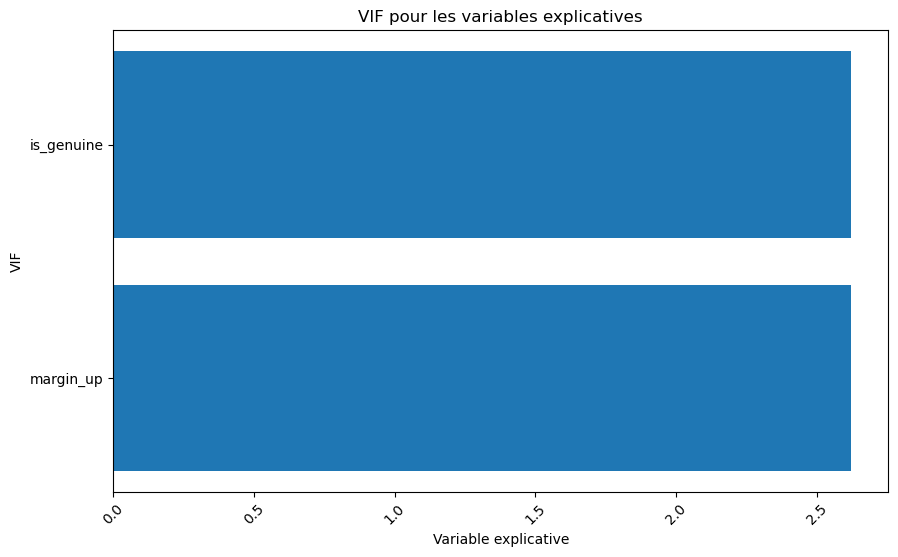


VÉRIFICATION DE LA LINEARITÉ



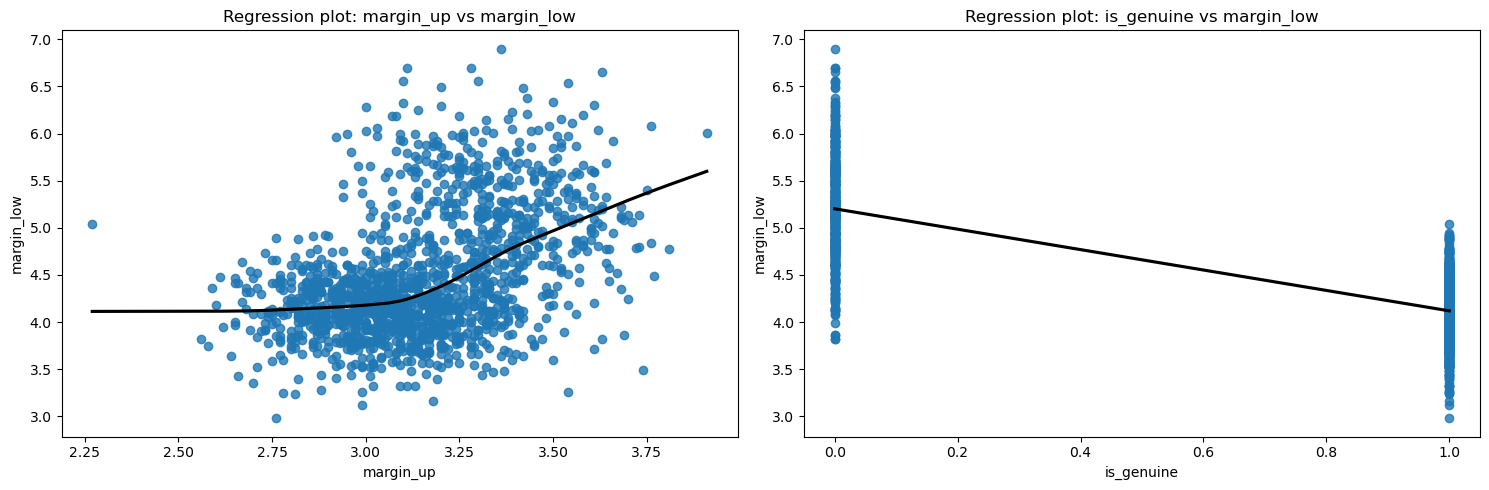


VÉRIFICATION DE L'HOMOSCÉDASTICITÉ

Scatterplot des résidus



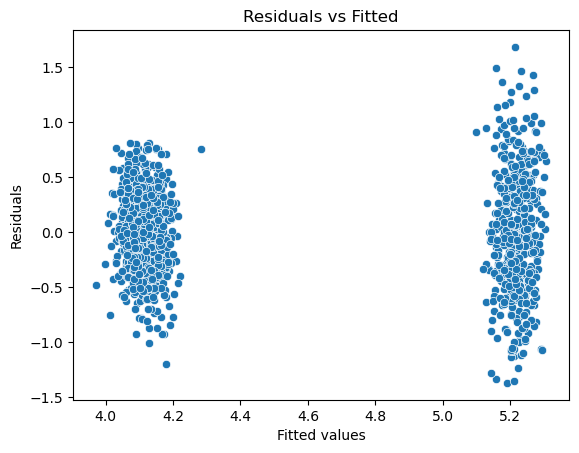


Test d'hétéroscédasticité de Breusch-Pagan

Statistique de test de Breusch-Pagan : 163.45772873027062
P-value du test de Breusch-Pagan : 3.2033559115833575e-36
=> Présence d'hétéroscédasticité dans les résidus (p_value < 0.05, on rejette H0)

=> Cela suggère que les résidus ne présentent pas une variance constante et que la variance des résidus
dépend probablement des valeurs prédites du modèle.

Test d'hétéroscédasticité de White

Statistique de test de White : 166.92896597830926
P-value du test de White : 4.769905016345007e-35
=> Hétéroscédasticité détectée (p_value < 0.05, on rejette H0)

VÉRIFICATION DE LA NORMALITÉ DES RÉSIDUS

Histogramme et graphique QQ



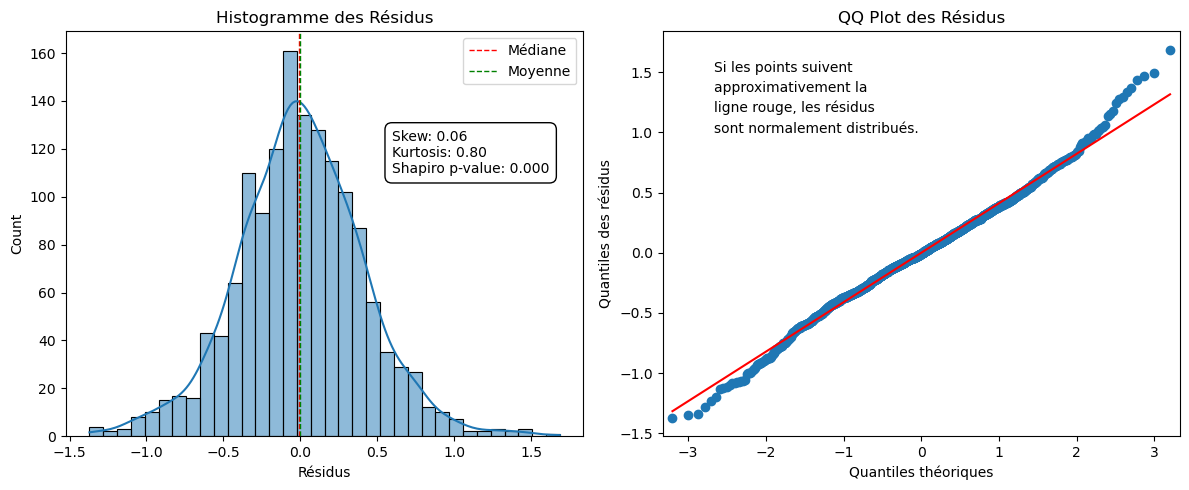


Test de normalité Shapiro-Wilk

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)
=> Sample does not look Gaussian (p_value < 0.05, we reject H0)

Moyenne et écart-type des résidus

La moyenne des résidus est de -4.375325954052497e-15
L'écart-type des résidus est de 0.41104644582686206

VÉRIFICATION DU L'AUTOCORRÉLATION DES RÉSIDUS

Statistique Durbin-Watson : 2.001491834240413
=> 1.5 < Durbin-Watson < 2.5 : Pas d'autocorrélation des résidus (l'hypothèse est validée)


In [26]:
# Liste des variables explicatives
explanatory_vars = ['margin_up', 'is_genuine', 'length', 'height_left', 'height_right', 'diagonal']
# Choix de la variable cible
target_variable = 'margin_low'

# utilisation de la fonction pour effectuer l'analyse de régression
regression_analysis(billets_not_nan, target_variable, explanatory_vars, intercept=True, hypo=True) #ajout de la constante Intercept

<br><span style="color:red">**=> Le meilleur modèle garde 2 variables significatives avec un R-squared de 0.617, le VIF indique une absence de multicolinéarité**</span>
<br><span style="color:red">**=> On note cependant la présence d'hétéroscédasticité dans les résidus, leur distribution n'est également pas gaussienne bien qu'elle soit symétrique avec une moyenne des résidus très proche de zéro et une dispersion relativement faible**</span>

## Entraînement du modèle

In [27]:
# Modification de la variable booléenne 'is_genuine' vers une variable numérique 
billets_not_nan['is_genuine'] = billets['is_genuine'].astype(int)

In [28]:
# Spécifier les variables
predictor_variables = ['margin_up', 'is_genuine'] 
target_variable = 'margin_low'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(billets_not_nan[predictor_variables],
                                                    billets_not_nan[target_variable],
                                                    test_size=0.2,
                                                    random_state=3)

# Appliquer la régression linéaire avec ajout de la constante intercept
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

### SHAP (SHapley Additive exPlanations)

Le SHAP permet de visualiser comment chaque feature (caractéristique) contribue aux prédictions du modèle (l'augmentation ou diminution de la variable cible).
<br>Les valeurs SHAP peuvent être positives (contribuant à une prédiction plus élevée) ou négatives (contribuant à une prédiction plus basse).

Regardons le SHAP pour notre modèle de régression linéaire :

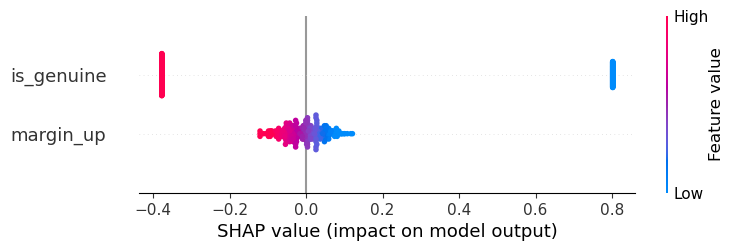

In [29]:
shap.initjs()

# Création d'un explainer SHAP
explainer = shap.Explainer(model, X_train)

# Calcul des valeurs SHAP pour un échantillon de données
shap_values = explainer.shap_values(X_test.iloc[0])

# Visualisation des valeurs SHAP pour l'échantillon
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

=> Nous remarquons que la variable `is_genuine` a le plus fort impact sur notre modèle

=> Lorsque la variable `is_genuine` est False, la prédiction de la valeur de `margin_low` a tendance à augmenter. De même, lorsque la variable `is_genuine` est True, la prédiction de la valeur de `margin_low` a tendance à diminuer.

=> Plus la variable `margin_up` est élevée, plus la prédiction de la valeur de `margin_low` a tendance à diminuer. De même, plus la variable `margin_up` est basse, plus la prédiction de la valeur de `margin_low` a tendance à augmenter.

Regardons les coefficients de notre modèle : 

In [30]:
coefficients = model.coef_
intercept = model.intercept_
score = model.score(X_test, y_test)

# Créez une liste des noms de variables correspondant aux coefficients
variable_names = list(X_train.columns)
for i in range(len(variable_names)):
    print(f"Coefficient pour {variable_names[i]} : {coefficients[i]:.3f}")
    
print(f"Intercept: {intercept:.3f}")
print(f"Score: {score:.3f}")

Coefficient pour margin_up : -0.222
Coefficient pour is_genuine : -1.179
Intercept: 5.975
Score: 0.645


=> Les coefficients de la régression linéaire valident les contributions des variables explicatives à la variable cible vues avec le SHAP. 

- **Intercept** est la valeur de la variable cible lorsque toutes les autres variables explicatives sont égales à zéro
- **Les coefficients** représentent la relation entre notre variable indépendante et la variable dépendante, où un changement d'exactement 1 à la variable explicative changera la valeur de notre variable cible du même montant que le coefficient
- **Le score** est une mesure de la performance globale du modèle sur un ensemble de données. Ici il indique dans quelle mesure le modèle est capable de prédire correctement la variable cible pour les données de test fournies

### Visualisation de la séparation et prédiction des données

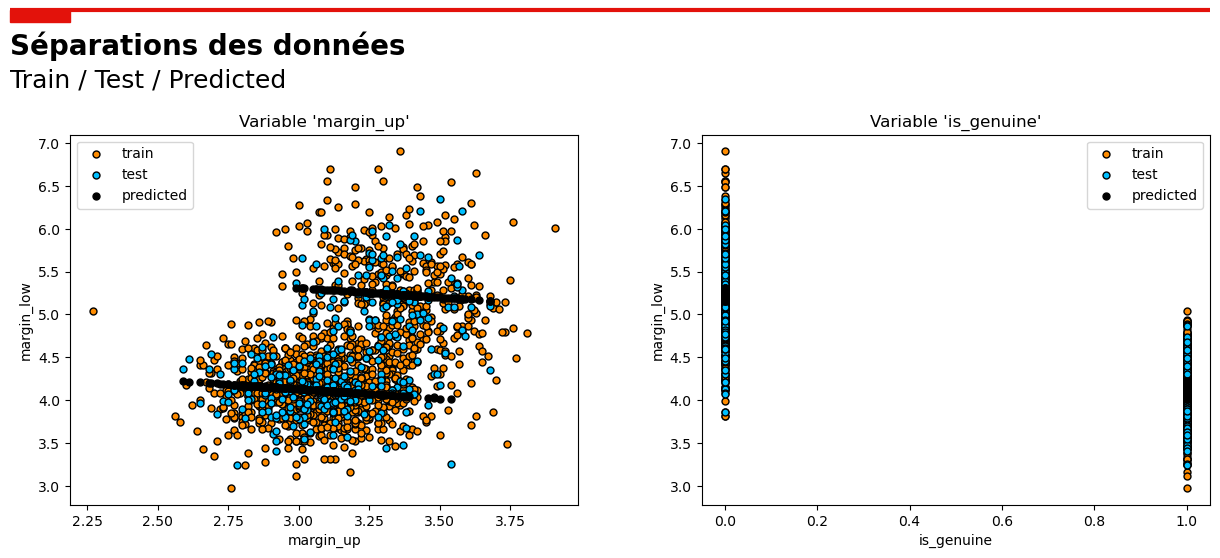

In [31]:
# Variables explicatives à visualiser
variables_to_plot = ['margin_up', 'is_genuine']

# Données prédites
y_pred = model.predict(X_test)

# Créer une figure avec des sous-graphiques en fonction du nombre de variables à visualiser
num_variables = len(variables_to_plot)
fig, axes = plt.subplots(1, num_variables, figsize=(6 * num_variables, 5))

# Boucle pour chaque variable explicative
for i, variable in enumerate(variables_to_plot):
    # Sélectionnez la variable explicative spécifique
    X_train_col = X_train[variable]
    X_test_col = X_test[variable]

    # Tracer le nuage de points dans le sous-graphique correspondant
    axes[i].scatter(X_train_col, y_train, s=25, color='#FF8C00', edgecolors='k', label='train')
    axes[i].scatter(X_test_col, y_test, s=25, color='deepskyblue', edgecolors='k', label='test')
    axes[i].scatter(X_test_col, y_pred, s=25, color='black', edgecolors='k', label='predicted')

    # Ajouter des légendes et un titre pour le sous-graphique
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('margin_low')
    axes[i].legend()
    axes[i].set_title(f"Variable '{variable}'", fontsize=12)

# Ajuster la disposition pour éviter la superposition
plt.tight_layout(w_pad = 5)

# Réglage des marges de la figure
fig.subplots_adjust(left=0.05, right=1, top=0.75, bottom=0.01)

# Ajout de texte
fig.text(0, 0.91, "Séparations des données", fontsize=20, fontweight="bold")
fig.text(0, 0.79, "Train / Test / Predicted\n", fontsize=18)

# Add caption
#source = "Source: Zofia Quillet / ONCFM"
#fig.text(0, -0.14, source, color=GREY, fontsize=10)

# Ajout de ligne et de rectangle
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Définir la couleur de fond de la figure
fig.set_facecolor("white")

# Afficher la figure
plt.show()

### Évaluation de la performance du modèle

In [32]:
# Calcul MAE, MSE et RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
 
# Calcul RMSPE
mean_y = np.mean(y_test)
rmspe = (rmse / mean_y) * 100

# Calcul R2
r2 = r2_score(y_test, y_pred)
 
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Root Mean Squared Percentage Error (RMSPE):", round(rmspe, 2))
print("Coefficient of Determination (R²):", round(r2, 2))

Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.38
Root Mean Squared Percentage Error (RMSPE): 8.45
Coefficient of Determination (R²): 0.65


**Interprétation**

- Un MAE de 0.29 signifie que, en moyenne, les prédictions du modèle ont une erreur absolue d'environ 0.29 unités par rapport aux valeurs réelles. Plus le MAE est bas, meilleure est la performance du modèle, car cela signifie que les prédictions sont plus proches des vraies valeurs.

- Un MSE de 0.15 signifie que, en moyenne, les prédictions du modèle ont une erreur quadratique d'environ 0.15 unités par rapport aux valeurs réelles. Le MSE est plus sensible aux erreurs importantes car il pénalise davantage les erreurs importantes que les erreurs plus petites.

- Un RMSE de 0.38 signifie que, en moyenne, les prédictions du modèle ont une erreur d'environ 0.38 unités par rapport aux valeurs réelles. Comme pour le MAE, un RMSE plus bas indique une meilleure performance.

- Un RMSPE de 8.45 signifie que, en moyenne, les prédictions du modèle ont une erreur relative d'environ 8.45 % par rapport aux valeurs réelles.

- Un R² de 0.65 signifie que le modèle explique environ 65 % de la variance totale de la variable dépendante. En d'autres termes, le modèle capture partiellement la variabilité des données, mais il reste encore une part de variabilité qui n'est pas expliquée par le modèle.

=> En résumé, des valeurs de MAE, MSE et RMSE plus faibles indiquent généralement une meilleure performance du modèle, car cela signifie que les prédictions sont plus proches des valeurs réelles. Dans notre cas, les valeurs du MAE, MSE et RMSE semblent indiquer une performance relativement bonne.

### Comparaison des valeurs réelles vs. prédites sur le test set

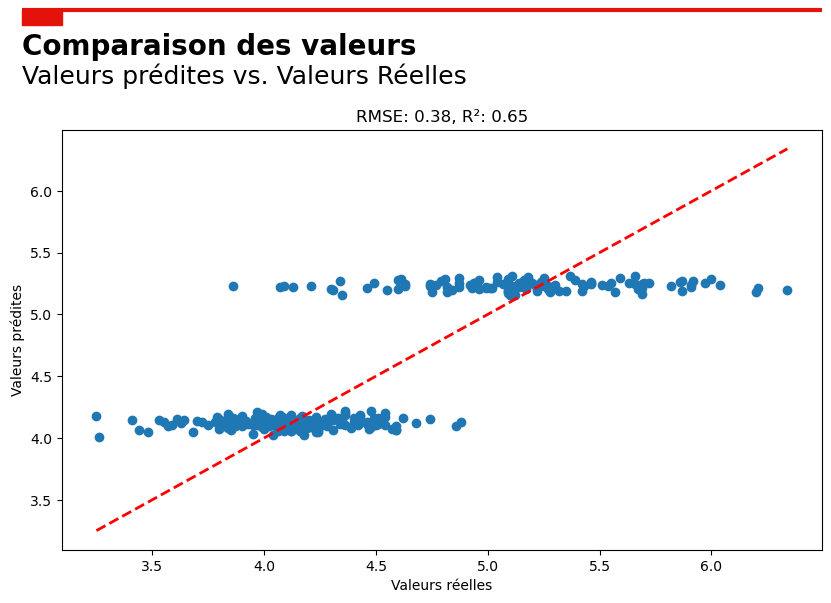

In [33]:
# Création du graphique
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)  # Créez un axe pour le graphique

# Tracer le scatter plot et la ligne rouge
ax.scatter(y_test, y_pred)

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Titre et étiquettes des axes
ax.set_title('RMSE: {:.2f}, R²: {:.2f}'.format(rmse, r2))
ax.set_xlabel('Valeurs réelles')
ax.set_ylabel('Valeurs prédites')

# Réglage des marges de la figure
fig.subplots_adjust(left=0.05, right=1, top=0.8, bottom=0.1)

# Ajout de texte
fig.text(0, 0.925, "Comparaison des valeurs", fontsize=20, fontweight="bold")
fig.text(0, 0.83, "Valeurs prédites vs. Valeurs Réelles\n", fontsize=18)

# Add caption
#source = "Source: Zofia Quillet / ONCFM"
#fig.text(0, -0.018, source, color=GREY, fontsize=10)

# Ajout de ligne et de rectangle
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Définir la couleur de fond de la figure
fig.set_facecolor("white")

# Afficher la figure
plt.show()

In [34]:
# DataFrame avec valeurs réelles vs. prédites
df_comparison = pd.DataFrame({'Valeurs réelles': y_test.values.flatten(),
                              'Valeurs prédites': y_pred.flatten()})
print(df_comparison.sample(10))

     Valeurs réelles  Valeurs prédites
186            4.070             5.219
240            5.210             5.241
11             4.300             5.204
2              4.750             5.239
274            4.100             4.142
43             4.120             4.058
143            5.630             5.252
157            4.340             5.270
273            4.400             4.158
130            5.110             5.308


### Imputation des NaNs avec le modèle entraîné

In [35]:
# Prédire les valeurs manquantes dans la colonne 'margin_low'
predicted_values = model.predict(billets[billets['margin_low'].isna()][predictor_variables])

# Remplir les valeurs NaN avec les valeurs prédites
billets.loc[billets['margin_low'].isna(), 'margin_low'] = predicted_values

# Vérification de la variable 'margin_low' après régression linéaire

## Nombre de NaNs

In [36]:
# Identification et vérification du nombre de NaN après régression linéaire
nan_indexes = billets[billets['margin_low'].isna()].index.tolist()
if len(nan_indexes) != 0:
    print(f"Il reste {len(nan_indexes)} NaNs ({round(len(nan_indexes) / len(billets) * 100, 2)} % du dataset) aaprès imputation")
    print("\nIndex des NaNs :", nan_indexes)
else:
    print(f"Il reste {len(nan_indexes)} NaNs ({round(len(nan_indexes) / len(billets) * 100, 2)} % du dataset) après imputation")
    print("Index des NaNs :", nan_indexes, "Absence de NaNs dans le dataset")

Il reste 0 NaNs (0.0 % du dataset) après imputation
Index des NaNs : [] Absence de NaNs dans le dataset


<span style="color:red">**=> L'imputation des NaNs a bien fonctionné**</span>

## Distributions avant / après remplissage des NaNs

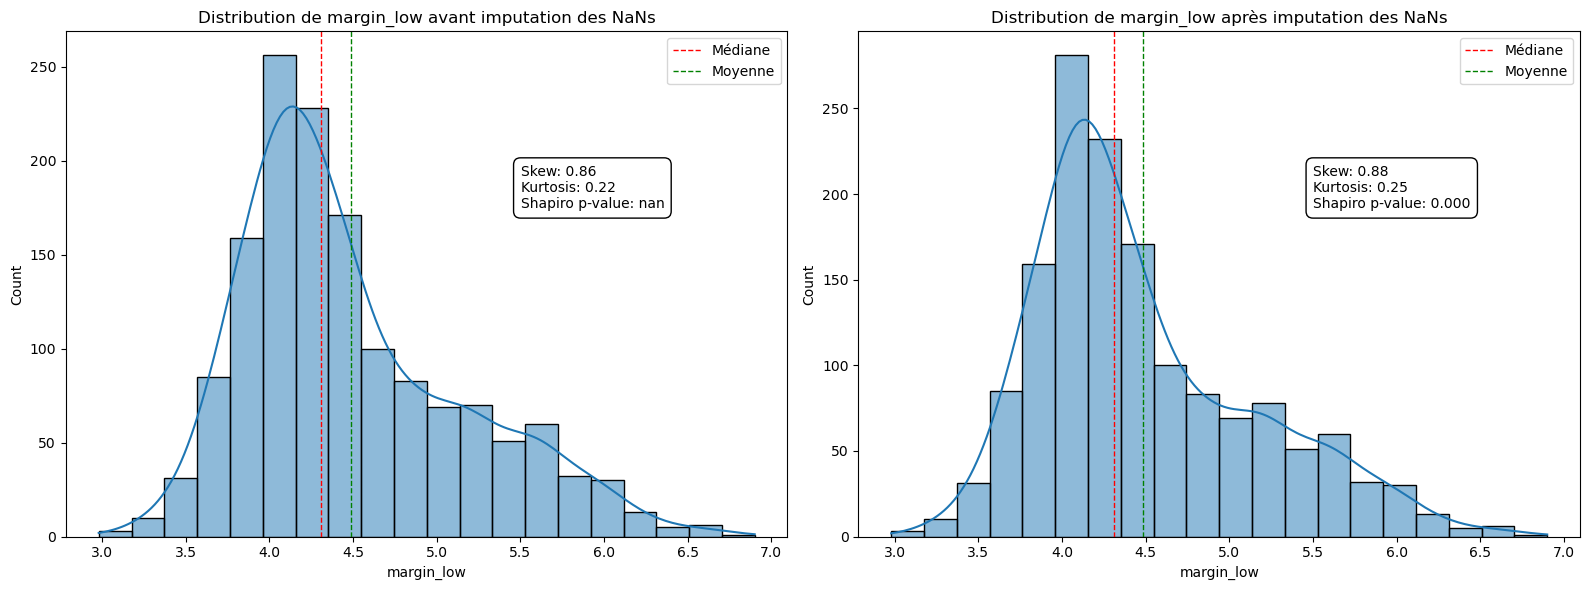

In [37]:
plot_distribution_comparison(distri_avant, billets, 'margin_low')

<span style="color:red">**=> La distribution de margin_low après imputation n'a que faiblement changé**</span>

# Exportation du dataframe final

In [38]:
billets.to_csv('src/billets_cleaned.csv', index=False)
print("Exportation terminée")

Exportation terminée
